![Wind Energy Banner](img/1.png)

Author: Irene Kilgannon

Student ID: G00220627

## Introduction

Since the first commercial wind farm opened at Bellacorrick, Co. Mayo in 1992 the capacity of wind farms in Ireland has increased significantly. There are now over 300 wind farms in the Republic of Ireland with a capacity of 4780 MW and with 568 MW in construction. In 2000, the [capacity was only 116.5 MW](https://cms.eirgrid.ie/sites/default/files/publications/Wind-Installed-Capacities-May-24.png). Now, the Galway Wind Park, Ireland’s largest wind farm has a total capacity of 192 MW which exceeds the country's total capacity in 2000. 

<img src="img/Wind_farms_SEAI.png" alt="Wind Farms" width="400"/>

_Credit [SEAI Wind Atlas](https://www.seai.ie/renewable-energy/wind-energy/wind-atlas-map)_

Increasing the amount of electricity produced from renewable sources is one of the aims of [Ireland’s Climate Action Plan](https://www.gov.ie/pdf/?file=https://assets.gov.ie/296414/7a06bae1-4c1c-4cdc-ac36-978e3119362e.pdf#page=null). It is hoped that by 2030, 80% of Ireland's electricity will be produced from renewable sources, of which 9000 MW should come from onshore wind energy. According to the [SEAI](https://www.seai.ie/data-and-insights/seai-statistics/renewables), currently ~ 40% of Ireland’s electricity is from renewable sources, with one third from wind energy.

The amount of electricity a turbine generates depends on the type of turbine and the wind conditions at any time. According to the most recent information available for 2019 - 2022, from [Orsted, a wind energy company with a number of wind farms in Ireland](https://orsted.ie/renewable-energy-solutions/onshore-wind/onshore-wind-facts/is-onshore-wind-power-reliable?gad_source=1&gclid=Cj0KCQiAvbm7BhC5ARIsAFjwNHsqQo_o5BNQDDSs188yJNVjuNKutenLgB4fyrrApMoVsbYHk8igaZUaAk-YEALw_wcB), 91% of the time there is enough wind for production, 1% of time there is too much wind and 8% of the time too little wind. Older turbines are less efficient than newer turbines. In Barnesmore, Co. Donegal, there is a project with planning permission to repower an existing 15 MW wind farm with 25 turbines and replace it with 13 turbines capable of generating 60-70 MW. Fewer turbines producing more power. 

There are many advantages to wind energy. There are no carbon emissions and they are 100% efficient at turning wind into electricity. Wind energy avoided 4.5 million tonnes of CO2 in 2020. There are some carbon emissions during production but it is estimated that after the 'carbon payback period' of 6 - 18 months, the turbine has already saved more than was created from its production. It is cheaper than fossil fuels so it should drive down the price of power.  

The expected lifespan of a turbine is 30 years but in Ireland some turbines only have planning permission for 20-25 years. Wind energy companies are attempting to extend the planning permission so that the wind farms can operate beyond their current planning permission. This is not a straight forward task as some of the existing wind farms are in locations that, since they were built have been rezoned as unsuitable for wind energy by local county councils. Others are in or close to areas now designated as Special Protected Areas. It is estimated that up to 20% of current wind farms could be lost under the current planning restrictions, which would make the [Climate Action Plan unachievable](https://www.windenergyireland.com/latest-news/7733-dozens-of-wind-farms-at-risk-from-outdated-planning-decisions-2) by 2030. The lifespan of a turbine can be increased by repair and maintenance. In some cases like in Co. Donegal, they plan to repower by replacing older wind turbines with newer more efficient models. If a wind farm is decommissioned, e.g at the [Derrybrien Wind Farm, Co. Galway](https://www.derrybrienwindfarm.ie/info), 85-95% of turbine is mostly made of steel and can be recycled. The blades are mad of fibreglass or carbon fibre held together with resin and cannot be easily or efficiently broken down for recycling.

## Project Aims

* Analyse wind energy production in the Republic of Ireland. 
    * Trends in wind speeds and wind energy
    * How much of our energy comes from wind?
    * What influence does the weather have on wind energy production?

* Create a machine learning model that can predict the wind energy output based on weather data

* Create a simple forecasting model to predict the wind energy production. 

In [245]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.dates import DateFormatter
from matplotlib.pylab import rcParams

# Modules for Seasonality
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [246]:
plt.style.use('seaborn-v0_8')

## The Data

### Wind Energy Data

[EirGrid's real-time system information](https://www.eirgrid.ie/grid/real-time-system-information) and [EirGrid's Smart Grid Dashboard](https://www.smartgriddashboard.com/#all) provide information on the status of the electricity grid. Both sites provide similar information and present it in different formats. Information on the current system demand, the total electricity production, the actual and forecast amount of electricity generated by wind energy, and the amount of imported electricity is available. THe electricity produced is measured in MW. Data is recorded every 15 minutes. The results can be filtered by all of Ireland, the Republic of Ireland, and Northern Ireland. One disadvantage of the site is that it is only possible to view information for a day at a time and download data for any single day, up to one month ago.

<img src="img/Eirgrid_Smart_Dashboard.png" alt="Eirgrid_Smart_Dashboard" width="800"/>

_EirGrid Smart Grid Dashboard_

Despite extensive searching, there doesn't appear to be an official source of EirGrid's historical data. However, I found a [GitHub repository by Daniel Parke](https://github.com/Daniel-Parke/EirGrid_Data_Download/tree/main), who has written a Python script to download historical data from EirGrid. His GitHub repository contains CSV files for the actual amount of electricity generated, actual demand, and amount of electricity produced by wind energy for every year from 2014 to early 2024. As the Met Éireann weather data is for the Republic of Ireland, the CSV files for the amount of wind energy produced in the Republic of Ireland from 2014 to 2023 were downloaded from this GitHub repository. To obtain the data for 2024 I ran his python script, [eirgrid_downloader.py](https://github.com/Daniel-Parke/EirGrid_Data_Download/blob/main/eirgrid_downloader.py) to get the 2024 data. 

Each CSV file was downloaded to the electricity directory and each CSV file contains one year's worth of data. The CSV files were merged and cleaned as outlined in [clean_electricity.ipynb](clean_electricity.ipynb) to give the CSV file, [hourly_wind_energy.csv](PFDA-project\data\hourly_wind_energy.csv), which will be used for this analysis. 

In [247]:
# Read the hourly_wind_energy data into Pandas
wind_energy_df = pd.read_csv('data/hourly_wind_energy.csv', 
                                    index_col= 'date', 
                                    parse_dates= ['date'])
wind_energy_df.head()

,Wind Energy (MW)
date,
2014-01-01 00:00:00,976.75
2014-01-01 01:00:00,914.25
2014-01-01 02:00:00,938.50
2014-01-01 03:00:00,911.25
2014-01-01 04:00:00,915.00


Two additional CSV files, hourly_actual.csv and demand_actual.csv were then read into Pandas. 

hourly_actual.csv has information on the actual amount of electricity produced in the ROI. This will be used to investigate to contribution of wind energy production to the total of electricity production. 

demand_actual.csv has information on the demand for electricity in the ROI. __HAVENT USED THIS YET MIGHT DELETE__

In [248]:
# Read in hourly_actual.csv
actual_df = pd.read_csv('data/hourly_actual.csv', index_col= 'date', parse_dates= ['date'])
actual_df.head()

,Actual (MW)
date,
2014-01-01 00:00:00,2707.50
2014-01-01 01:00:00,2545.00
2014-01-01 02:00:00,2398.75
2014-01-01 03:00:00,2305.75
2014-01-01 04:00:00,2358.00


In [249]:
# Read in hourly_demand.csv
demand_df = pd.read_csv('data/hourly_demand.csv', index_col= 'date', parse_dates= ['date'])
demand_df.head()

,Demand (MW)
date,
2014-01-01 00:00:00,2845.25
2014-01-01 01:00:00,2637.50
2014-01-01 02:00:00,2413.25
2014-01-01 03:00:00,2251.50
2014-01-01 04:00:00,2132.25


### Weather Data

The weather data was downloaded from [Met Éireann historical data](https://www.met.ie/climate/available-data/historical-data). The data from a number of weather stations was downloaded with the choice of weather station based on their proximity to a wind farm. A number were also selected for the size of the data set. Weather information for Shannon Airport, Dublin Airport and Valentia dates back to the mid-1940's.

The Met Éireann weather data used for this analysis was recorded hourly. Measurements such as rainfall (mm), wind speed (knots), wind direction (degrees), relative humidity (%) and temperature (Celsius) are recorded. 

The preparation of the weather data for analysis is described in [clean_weather.ipynb](clean_weather.ipynnb). Two CSV files, [full_weather.csv](data/weather/merged_data/full_weather.csv) and [weather_analysis.csv](data/weather/merged_data/weather_analysis.csv) were created. 

full_weather.csv has the hourly weather data for all weather stations. It is the raw unprocessed hourly data. full_weather.csv was used to analyse weather trends in the notebook [weather_trends.ipynb](weather_trends.ipynb).

weather_analysis.csv was created from full_weather.csv. It contains the hourly mean weather data for all weather stations from 2014. It will be merged with the wind energy data set to create a data set with weather and energy data. 

In [250]:
# Read in weather_analysis
weather_df = pd.read_csv('data/weather/merged_data/weather_analysis.csv', 
                              index_col= 'date', 
                              parse_dates= ['date']
                              )

weather_df.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75


### Merge Weather and Wind Energy Data Sets

In [251]:
# Merge weather and wind energy data frames.
electricity_weather = pd.concat([weather_df, wind_energy_df, actual_df, demand_df], axis = 1)
electricity_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58,976.75,2707.50,2845.25
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17,914.25,2545.00,2637.50
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17,938.50,2398.75,2413.25
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33,911.25,2305.75,2251.50
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75,915.00,2358.00,2132.25


In [252]:
# Save the data 
electricity_weather.to_csv('data/electricity_weather.csv')

## Preparation of electricity_weather for Analysis

### Check for Missing Data

In [253]:
# Check for missing data
electricity_weather.isna().sum()

Pressure (hPa)           22
Rain (mm)                22
Relative Humidity (%)    22
Temp (°C)                22
Wind Direction (deg)     22
Wind Speed (knots)       22
Wind Energy (MW)          0
Actual (MW)               0
Demand (MW)               0
dtype: int64

In [254]:
# Find the rows with missing data
nan_rows = electricity_weather[electricity_weather.isna().any(axis = 1)]
nan_rows

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2025-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1951.75,2739.75,3498.25
2025-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1945.50,2726.25,3372.50
2025-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1829.75,2621.75,3278.00
2025-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1699.00,2495.75,3168.25
2025-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1541.75,2335.00,3045.00
2025-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1487.75,2282.75,2986.75
2025-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1791.50,2594.50,3043.00
2025-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1891.75,2685.25,3161.50
2025-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1718.50,2517.25,3234.00


All the missing data is weather data from the 1st January 2025.

In [255]:
# Drop the rows with missing data
electricity_weather = electricity_weather.dropna()

In [256]:
# Check that the missing rows at the tail of the data set have been removed. 
electricity_weather.tail()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2024-12-31 19:00:00,1004.70,0.68,87.67,9.28,238.33,13.33,2453.00,3309.50,4298.00
2024-12-31 20:00:00,1004.55,0.66,89.25,8.78,241.67,12.58,2216.50,3061.50,4021.25
2024-12-31 21:00:00,1004.07,0.76,86.75,8.55,235.00,11.83,2081.00,2954.00,3818.75
2024-12-31 22:00:00,1003.66,0.98,88.67,8.16,245.83,11.50,1922.25,2738.00,3649.50
2024-12-31 23:00:00,1002.96,0.93,87.92,7.98,246.67,12.50,1889.25,2686.25,3597.75


In [257]:
electricity_weather.shape

(96432, 9)

In [258]:
electricity_weather.describe().round(2)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
count,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00
mean,1012.92,0.14,83.07,10.33,203.11,8.87,1006.28,3253.40,3345.01
std,12.63,0.27,9.65,4.48,62.77,4.10,794.82,576.22,630.52
min,952.68,0.00,36.17,-4.42,15.83,1.50,-44.00,1530.00,1684.25
25%,1005.42,0.00,77.67,7.12,160.00,5.67,330.25,2869.25,2887.50
50%,1014.29,0.03,85.33,10.37,210.83,8.17,817.50,3211.18,3372.25
75%,1021.70,0.15,90.42,13.62,250.00,11.25,1542.00,3596.06,3786.25
max,1048.03,4.72,98.58,27.44,350.83,30.83,3814.25,6146.00,5659.75


In [259]:
electricity_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2014-01-01 00:00:00 to 2024-12-31 23:00:00
Freq: h
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure (hPa)         96432 non-null  float64
 1   Rain (mm)              96432 non-null  float64
 2   Relative Humidity (%)  96432 non-null  float64
 3   Temp (°C)              96432 non-null  float64
 4   Wind Direction (deg)   96432 non-null  float64
 5   Wind Speed (knots)     96432 non-null  float64
 6   Wind Energy (MW)       96432 non-null  float64
 7   Actual (MW)            96432 non-null  float64
 8   Demand (MW)            96432 non-null  float64
dtypes: float64(9)
memory usage: 7.4 MB


In [260]:
# Check for duplicates
electricity_weather.duplicated().sum()

0

### SNSP Limit and Dispatch Down

Wind energy is an intermittent source of electricity. Over the first ten months of 2024, 14 per cent of wind energy production was lost because of [challenges with the transmission network](https://www.windenergyireland.com/latest-news/7815-wind-farms-provided-32-per-cent-of-ireland-s-electricity-so-far-in-2024-3). When this happens wind farms are instructed to reduce the amount of power they produce or shut down completely, resulting in the use of more expensive fossil fuels. This is called ['dispatch down'](https://cms.eirgrid.ie/sites/default/files/publications/Wind-DD-Historical-December-2024.png). Dispatch down can arise due to constraints and curtailments. Ireland's electricity, like most other locations in the world operates at a frequency of 50 Hz. Wind energy is 'non-synchronous', which means that the frequency at which the wind produces energy is not at 50 Hz. To ensure the frequency levels stay stable EirGrid have the 'System Non-Synchronous Penetration (SNSP) limit in place. SNSP limit is the best known form of curtailment. The SNSP limit has been increasing steadily. From 2011 to 2018, the SNSP limit was gradually increased from 50% to 65%. In 2022 the SNSP limit was increased to its current level of 75%. This means that on a very windy day wind farms are dispatched down until they reach the 75% limit.

In [261]:
# Add SNSP Column
electricity_weather['SNSP'] = 0.5

In [262]:
electricity_weather.loc['2015-10': '2016-09', 'SNSP'] = 0.55
electricity_weather.loc['2016-10': '2017-10', 'SNSP'] = 0.60
electricity_weather.loc['2017-11': '2020-12', 'SNSP'] = 0.65
electricity_weather.loc['2021-01': '2021-03', 'SNSP'] = 0.70
electricity_weather.loc['2021-04': , 'SNSP'] = 0.75

In [263]:
electricity_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2014-01-01 00:00:00 to 2024-12-31 23:00:00
Freq: h
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure (hPa)         96432 non-null  float64
 1   Rain (mm)              96432 non-null  float64
 2   Relative Humidity (%)  96432 non-null  float64
 3   Temp (°C)              96432 non-null  float64
 4   Wind Direction (deg)   96432 non-null  float64
 5   Wind Speed (knots)     96432 non-null  float64
 6   Wind Energy (MW)       96432 non-null  float64
 7   Actual (MW)            96432 non-null  float64
 8   Demand (MW)            96432 non-null  float64
 9   SNSP                   96432 non-null  float64
dtypes: float64(10)
memory usage: 10.1 MB


The data set for weather-wind energy analysis has 9 columns with almost 96500 rows. 

The index is of a datetime datatype, with the date and time the observation was recorded at. The measurements recorded were pressure (hPa), rain (mm), relative humidity (%), temperature (°C), wind direction (deg), wind speed (knots) and wind energy (MW). The columns are all of float datatype. Any missing rows were removed and there are no duplicates in the data set. 

### Resample the Dataframe

Add comment on resample. 

In [264]:
# Resample electricity_weather to monthly
electricity_weather_monthly = electricity_weather.resample('ME').mean()
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,774.699933,2918.037970,3226.143481,0.5
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,925.433780,2957.232143,3247.277902,0.5
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,647.850806,2879.901210,3093.364583,0.5
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,493.911111,2653.940625,2844.000347,0.5
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,461.017809,2560.199933,2766.980847,0.5


In [265]:
# Resample electricity_weather to yearly
electricity_weather_yearly = electricity_weather.resample('YE').mean()
electricity_weather_yearly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-12-31,1009.612358,0.143958,83.663824,10.373425,202.467838,8.969831,577.399201,2750.272888,2941.907934,0.500000
2015-12-31,1014.334928,0.158265,82.578727,9.749905,207.072672,9.750983,746.253796,3027.463633,3031.187471,0.512603
2016-12-31,1014.133200,0.126062,82.708215,10.061733,197.370263,8.765640,690.754696,3268.759985,3092.353484,0.562568
2017-12-31,1014.494323,0.131558,83.605372,10.331381,212.948322,8.970461,824.732820,3270.169777,3166.870131,0.608356
2018-12-31,1012.622821,0.130379,82.380785,10.145537,196.043534,8.948595,991.110859,3257.170721,3298.738741,0.650000


## Exploratory Data Analysis

### Histograms

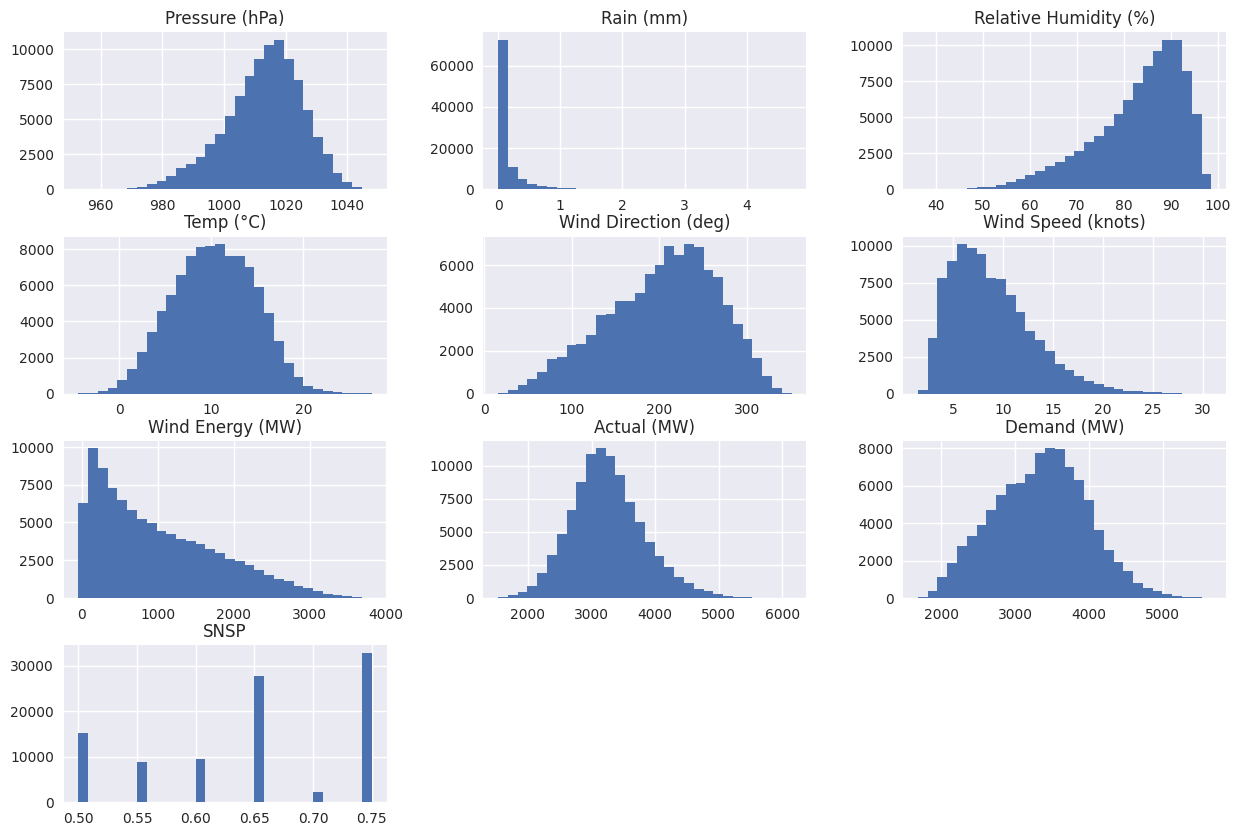

In [266]:
# Plot the distribution of the data
electricity_weather.hist(figsize= (15,10), bins = 30)

plt.show()

In [267]:
count_negative_wind_energy = (electricity_weather['Wind Energy (MW)'] < 0).sum()
count_negative_wind_energy

49

Comment on the distribution. 

In the histogram for wind energy it was surprising to see a number of rows with values less than zero. There were 49 occasions when the wind turbines were consuming energy from the grid instead of producing energy. 

In [268]:
electricity_weather.loc[electricity_weather['Wind Energy (MW)'] < 0]

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-10-12 00:00:00,1012.22,0.00,93.92,5.73,147.50,2.00,-0.75,2396.500000,2380.250000,0.50
2014-10-12 01:00:00,1012.32,0.00,94.67,5.32,167.50,1.75,-2.50,2317.500000,2234.750000,0.50
2014-10-12 02:00:00,1012.32,0.00,95.33,5.13,195.83,2.42,-1.50,2191.500000,2101.750000,0.50
2014-10-12 03:00:00,1012.22,0.01,95.67,5.31,215.83,2.42,-1.25,2120.750000,2009.500000,0.50
2014-10-12 05:00:00,1012.18,0.02,96.17,4.62,168.33,2.75,-1.00,2007.250000,1983.500000,0.50
2014-10-12 06:00:00,1012.27,0.01,97.00,4.33,124.17,2.83,-1.25,2116.750000,2025.500000,0.50
2014-10-12 07:00:00,1012.55,0.00,97.00,4.19,195.00,2.75,-1.50,2172.250000,2130.750000,0.50
2016-05-16 09:00:00,1023.16,0.00,70.25,11.98,160.00,3.42,-2.25,3057.000000,3368.000000,0.55
2016-05-16 10:00:00,1022.94,0.00,68.00,13.02,182.50,3.75,-1.00,2999.500000,3389.250000,0.55


### Boxplot

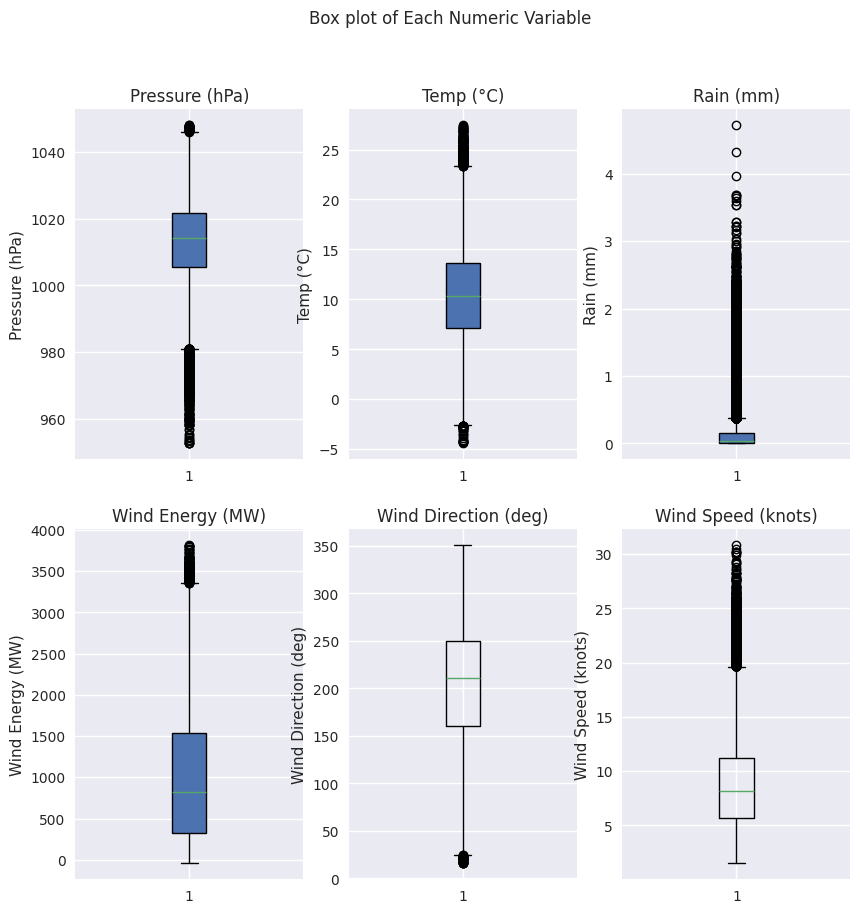

In [269]:
fix, ax = plt.subplots(2, 3, figsize = (10,10))

# Boxplot of Pressure
ax[0,0].boxplot(data= electricity_weather, x = 'Pressure (hPa)', patch_artist = True)
ax[0,0].set_title('Pressure (hPa)')
ax[0,0].set_ylabel('Pressure (hPa)')

# Boxplot of Temperature
ax[0,1].boxplot(data= electricity_weather, x = 'Temp (°C)', patch_artist = True)
ax[0,1].set_title('Temp (°C)')
ax[0,1].set_ylabel('Temp (°C)')

# Boxplot of Rain
ax[0,2].boxplot(data= electricity_weather, x = 'Rain (mm)', patch_artist = True)
ax[0,2].set_title('Rain (mm)')
ax[0,2].set_ylabel('Rain (mm)')

# Boxplot of Wind Energy
ax[1,0].boxplot(data= electricity_weather, x = 'Wind Energy (MW)', patch_artist = True)
ax[1,0].set_title('Wind Energy (MW)')
ax[1,0].set_ylabel('Wind Energy (MW)')

# Boxplot of Wind Direction
ax[1,1].boxplot(data= electricity_weather, x = 'Wind Direction (deg)')
ax[1,1].set_title('Wind Direction (deg)')
ax[1,1].set_ylabel('Wind Direction (deg)')

# Boxplot of Wind Speed
ax[1,2].boxplot(data= electricity_weather, x = 'Wind Speed (knots)')
ax[1,2].set_title('Wind Speed (knots)')
ax[1,2].set_ylabel('Wind Speed (knots)')

plt.suptitle('Box plot of Each Numeric Variable')
plt.show()

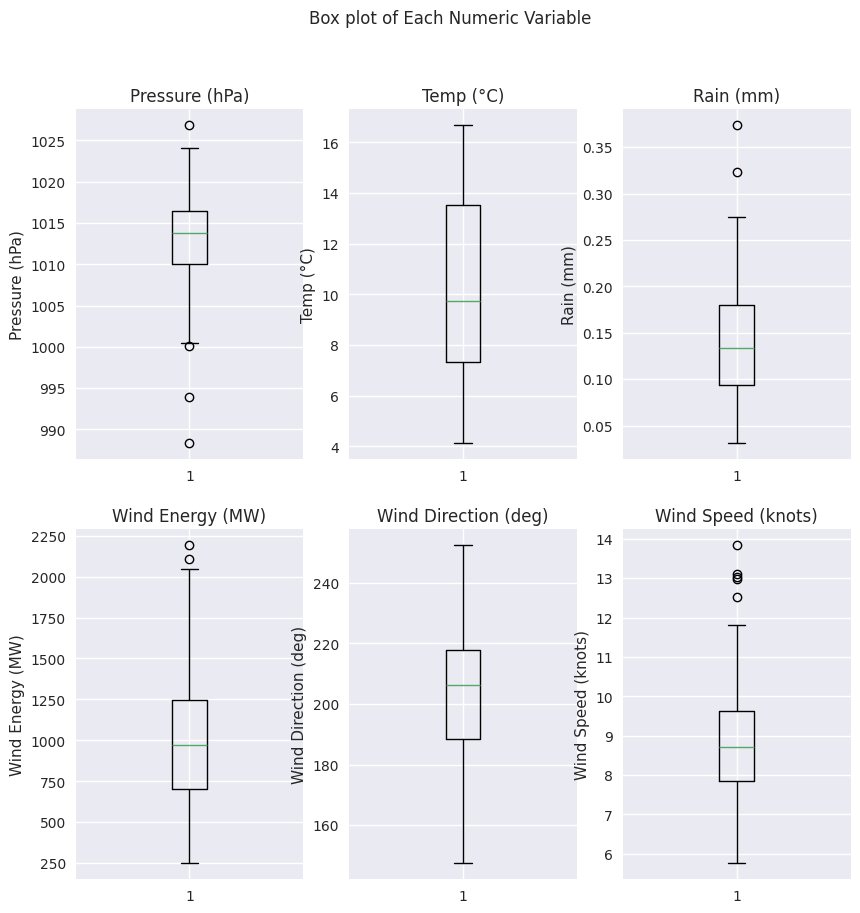

In [270]:
# Overall plot title

fix, ax = plt.subplots(2, 3, figsize = (10,10))

ax[0,0].boxplot(data= electricity_weather_monthly, x = 'Pressure (hPa)')
ax[0,0].set_title('Pressure (hPa)')
ax[0,0].set_ylabel('Pressure (hPa)')

# Boxplot of temperature
ax[0,1].boxplot(data= electricity_weather_monthly, x = 'Temp (°C)')
ax[0,1].set_title('Temp (°C)')
ax[0,1].set_ylabel('Temp (°C)')


ax[0,2].boxplot(data= electricity_weather_monthly, x = 'Rain (mm)')
ax[0,2].set_title('Rain (mm)')
ax[0,2].set_ylabel('Rain (mm)')


ax[1,0].boxplot(data= electricity_weather_monthly, x = 'Wind Energy (MW)')
ax[1,0].set_title('Wind Energy (MW)')
ax[1,0].set_ylabel('Wind Energy (MW)')


ax[1,1].boxplot(data= electricity_weather_monthly, x = 'Wind Direction (deg)')
ax[1,1].set_title('Wind Direction (deg)')
ax[1,1].set_ylabel('Wind Direction (deg)')

ax[1,2].boxplot(data= electricity_weather_monthly, x = 'Wind Speed (knots)')
ax[1,2].set_title('Wind Speed (knots)')
ax[1,2].set_ylabel('Wind Speed (knots)')

plt.suptitle('Box plot of Each Numeric Variable')
plt.show()

## Investigate Wind Energy and Wind Speeds

Comment on results of weather_trends. Add plots. 

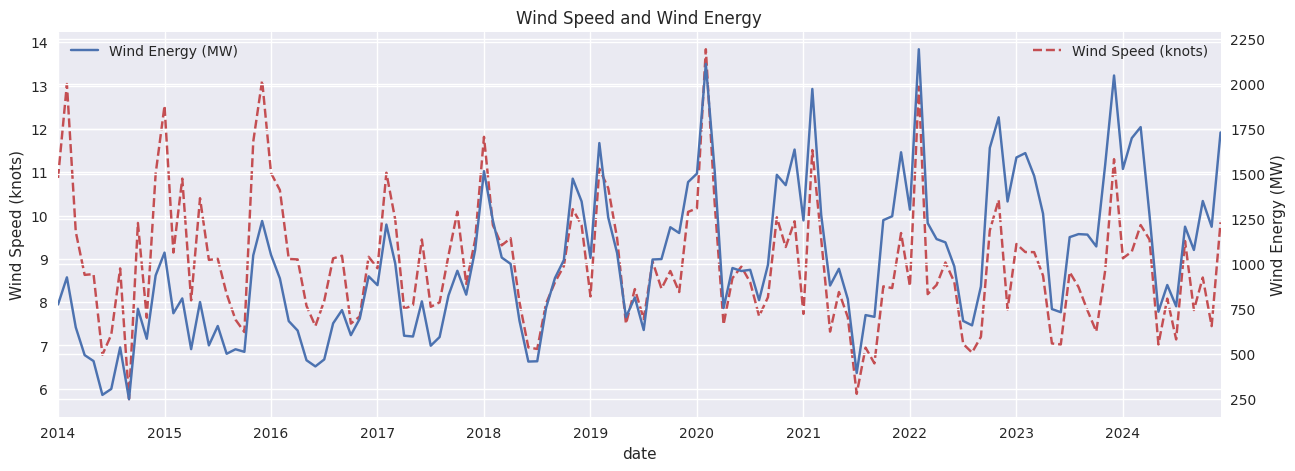

In [271]:
# Plot of Wind Speed and Wind Energy.

fig, ax = plt.subplots(figsize = (15,5))

# Plot Monthly Wind Speed
electricity_weather_monthly['Wind Speed (knots)'].plot(ax=ax, color = '#c44e52', linestyle = 'dashed', label= 'Wind Speed (knots)')
ax.legend()
plt.ylabel('Wind Speed (knots)')

ax2 = ax.twinx()

# Plot Monthly Wind Energy
electricity_weather_monthly['Wind Energy (MW)'].plot(ax= ax2, label= 'Wind Energy (MW)')
ax2.legend(loc = 'upper left')

plt.title('Wind Speed and Wind Energy')
plt.ylabel('Wind Energy (MW)')
plt.show()

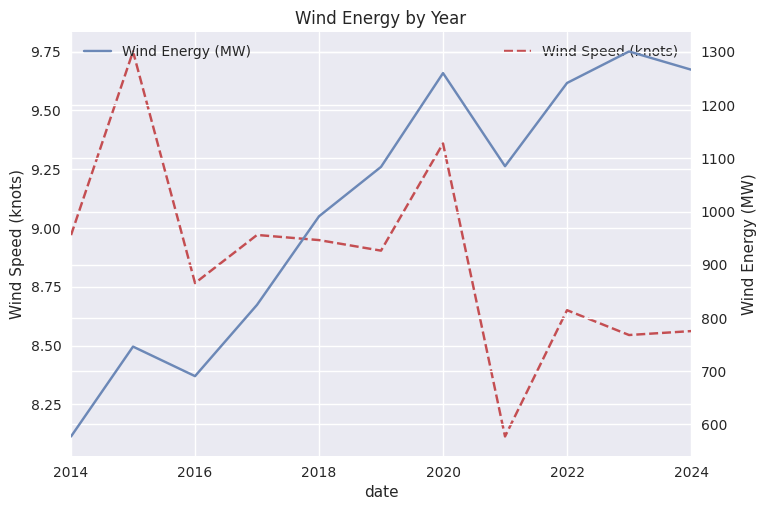

In [272]:
# Plot of Wind Energy and Wind Speeds by year.
fig, ax = plt.subplots()

electricity_weather_yearly['Wind Speed (knots)'].plot(ax=ax, linestyle = 'dashed', color = '#C44E52', label = 'Wind Speed (knots)')
plt.ylabel('Wind Speed (knots)')
plt.legend()

ax2 = ax.twinx()

electricity_weather_yearly['Wind Energy (MW)'].plot(ax= ax2, color = '#6C88B7', label = 'Wind Energy (MW)')
plt.ylabel('Wind Energy (MW)')
plt.title('Wind Energy by Year')
plt.legend()
plt.show()

# ADD LABELS

Does the improvement in Wind Energy output in 2017 coincide with the change in the SNSP limit?

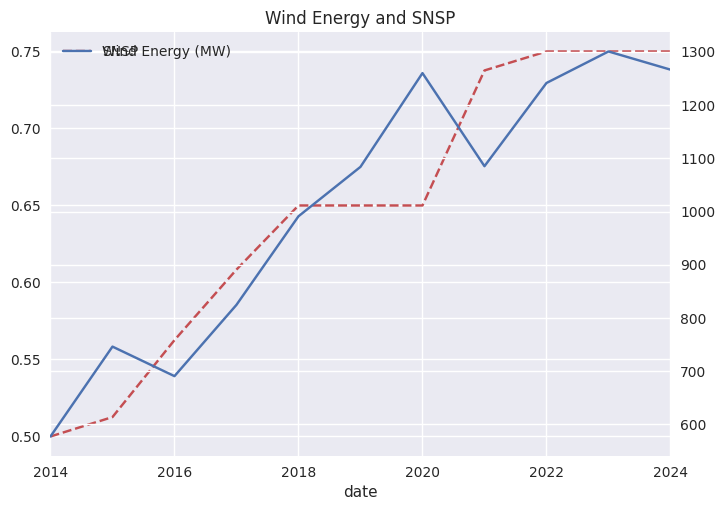

In [273]:
fig, ax = plt.subplots()

electricity_weather_yearly['SNSP'].plot(ax=ax, linestyle = 'dashed', color = '#C44E52', label = 'SNSP')
plt.legend()

ax2 = ax.twinx()

electricity_weather_yearly['Wind Energy (MW)'].plot(ax= ax2, label = 'Wind Energy (MW)')
plt.legend()

plt.title('Wind Energy and SNSP')

plt.show()

How much energy comes from wind power?

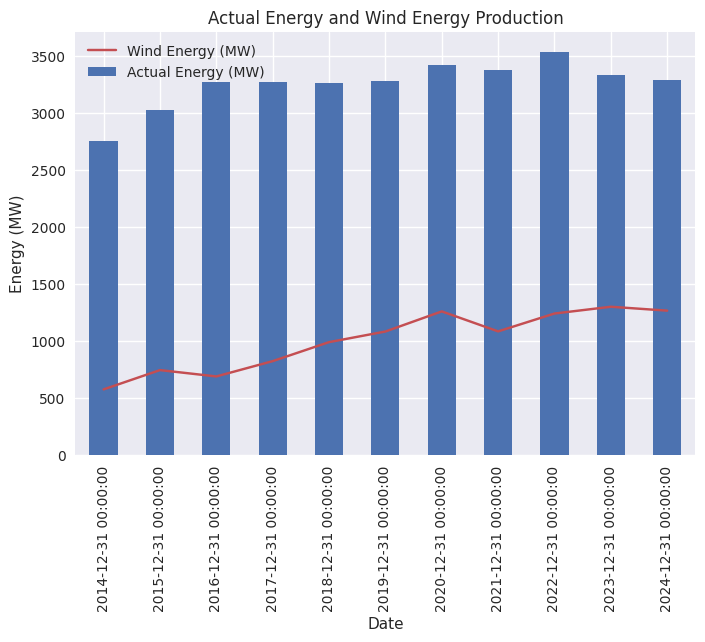

In [274]:
fig, ax = plt.subplots()


ax = electricity_weather_yearly.plot(y = 'Wind Energy (MW)', color = '#C44E52', linestyle = '-', ax = ax, label = 'Wind Energy (MW)', use_index= False)

electricity_weather_yearly['Actual (MW)'].plot(kind = 'bar', label = 'Actual Energy (MW)')
                                                
ax.set_xlabel('Date')
ax.set_ylabel("Energy (MW)")
ax.set_title("Actual Energy and Wind Energy Production")
ax.legend(loc="upper left")

plt.show()

#add a line in at 80% for Climate action plan

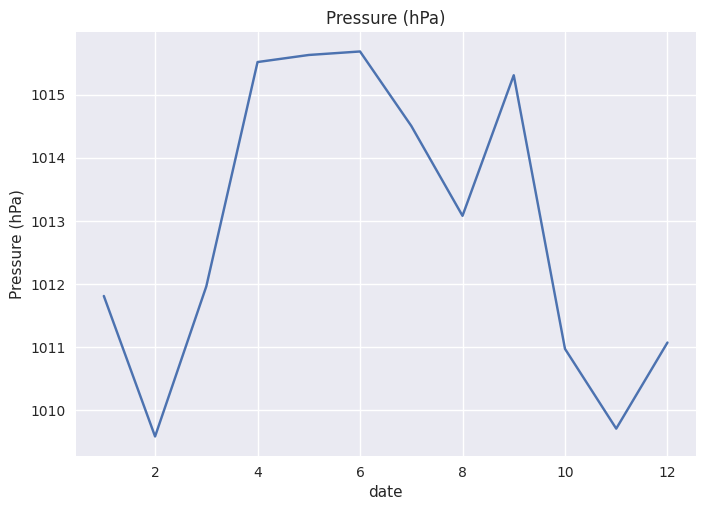

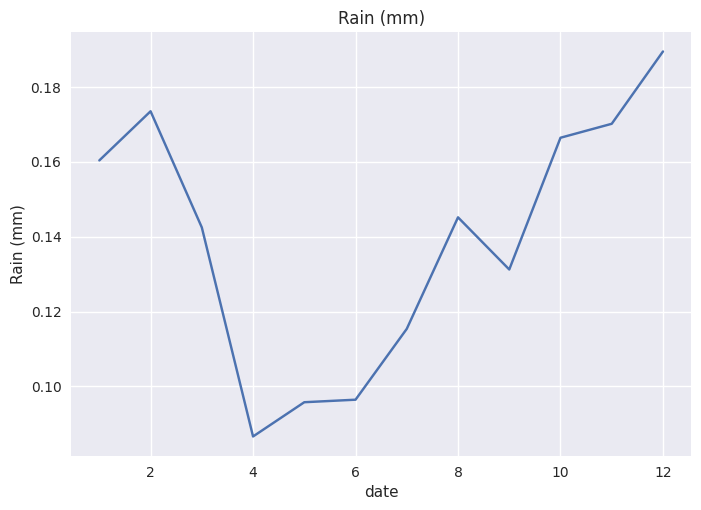

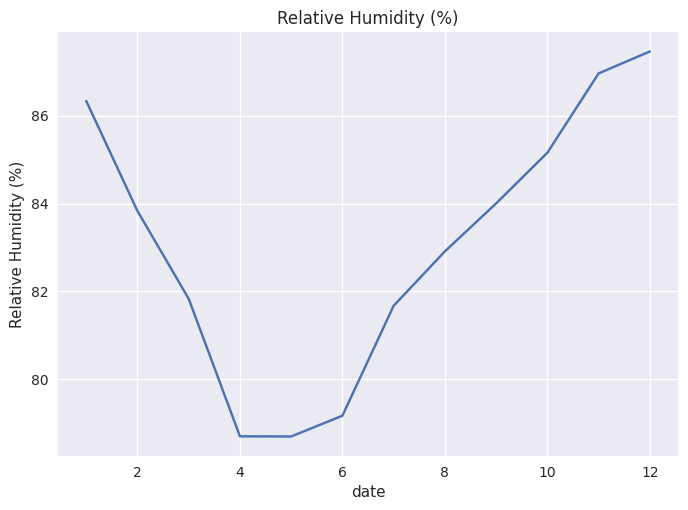

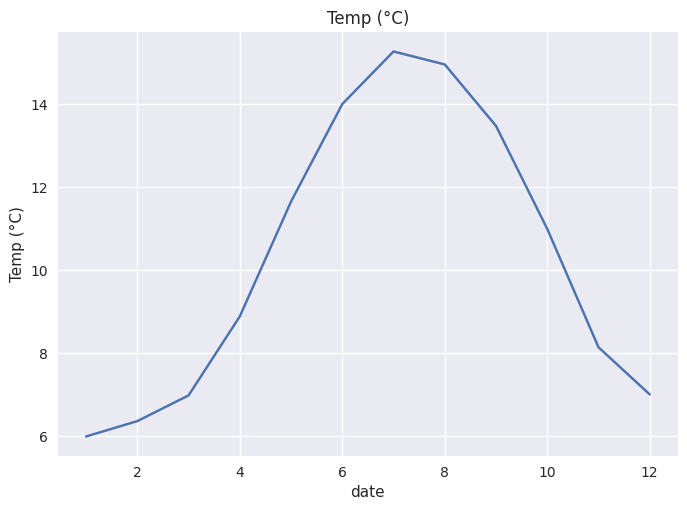

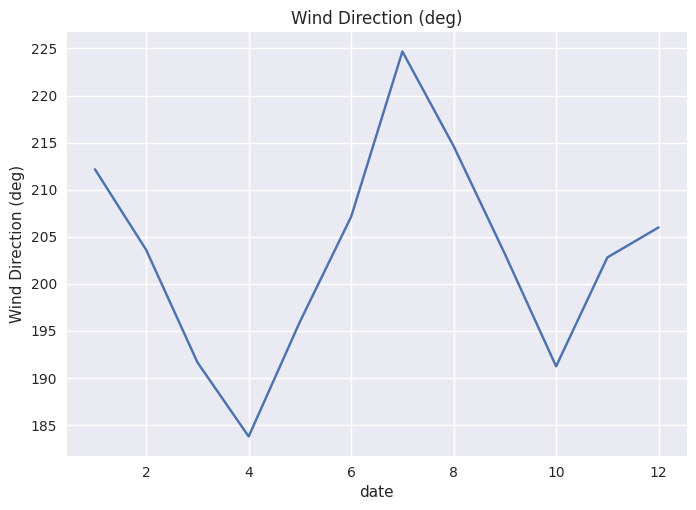

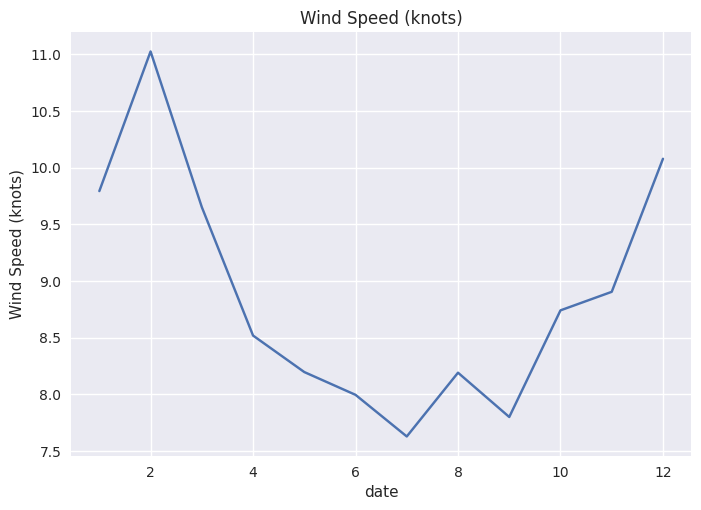

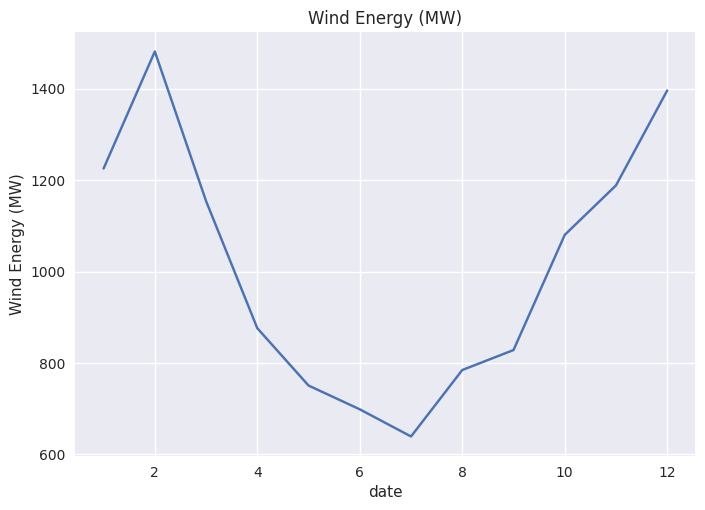

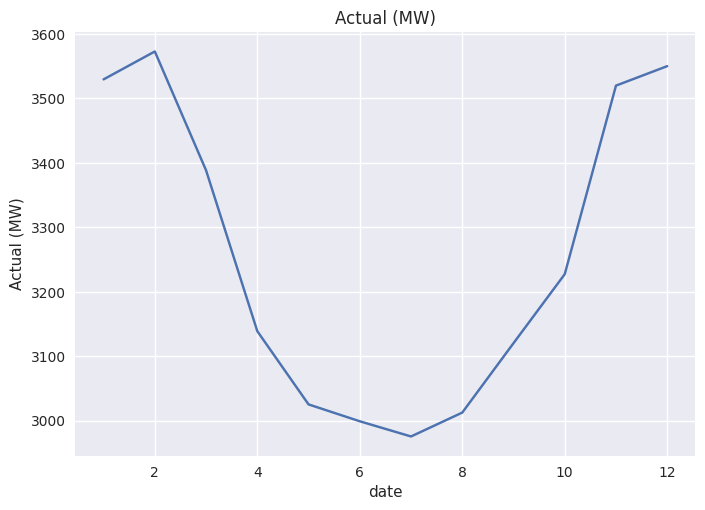

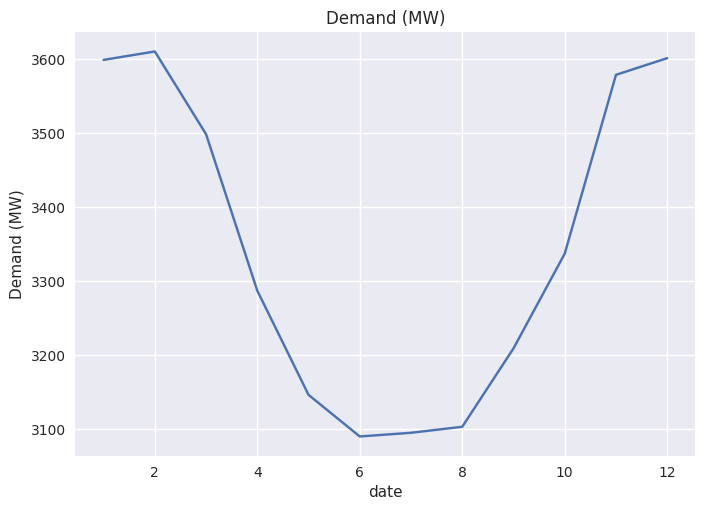

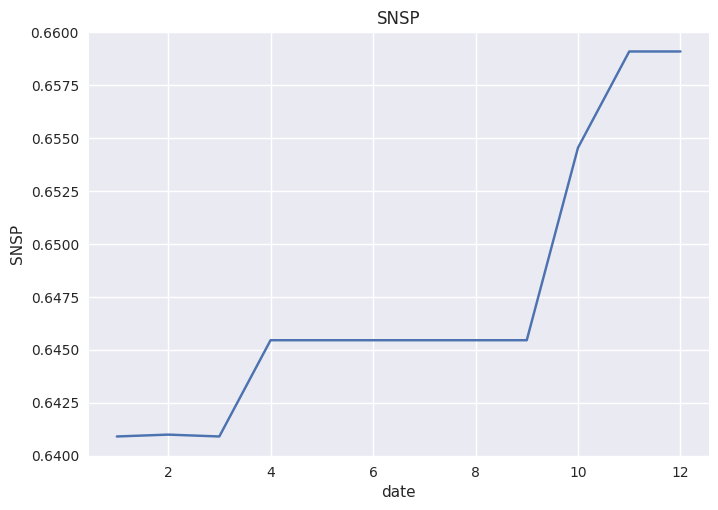

In [275]:
# Monthly Trends in Weather Data
col = ['']

for col in electricity_weather:
    fig, ax = plt.subplots()
    sns.lineplot(electricity_weather, x = electricity_weather.index.month, y = col, errorbar= None)
    plt.title(f'{col}')
    plt.show()

### Scatter Plots

### ADD more scatter plots

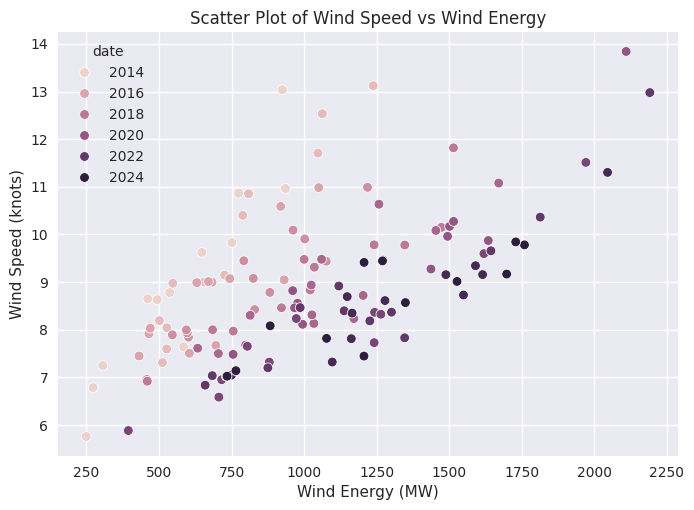

In [276]:
fig, ax = plt.subplots()
sns.scatterplot(data = electricity_weather_monthly, 
                x= 'Wind Energy (MW)', 
                y = 'Wind Speed (knots)', 
                hue= electricity_weather_monthly.index.year
                )
plt.title('Scatter Plot of Wind Speed vs Wind Energy')
plt.show()

Has the correlation between wind speed and wind energy changed by year? NO.

In [277]:
correlations = electricity_weather.groupby(electricity_weather.index.year).apply(lambda x: x['Wind Energy (MW)'].corr(x['Wind Speed (knots)']))
correlations = correlations.reset_index(name='correlation')
correlations

,date,correlation
0,2014,0.898165
1,2015,0.909520
2,2016,0.896749
3,2017,0.899880
4,2018,0.891537
5,2019,0.880873
6,2020,0.877169
7,2021,0.886641
8,2022,0.888947
9,2023,0.895022


### Correlation Analysis

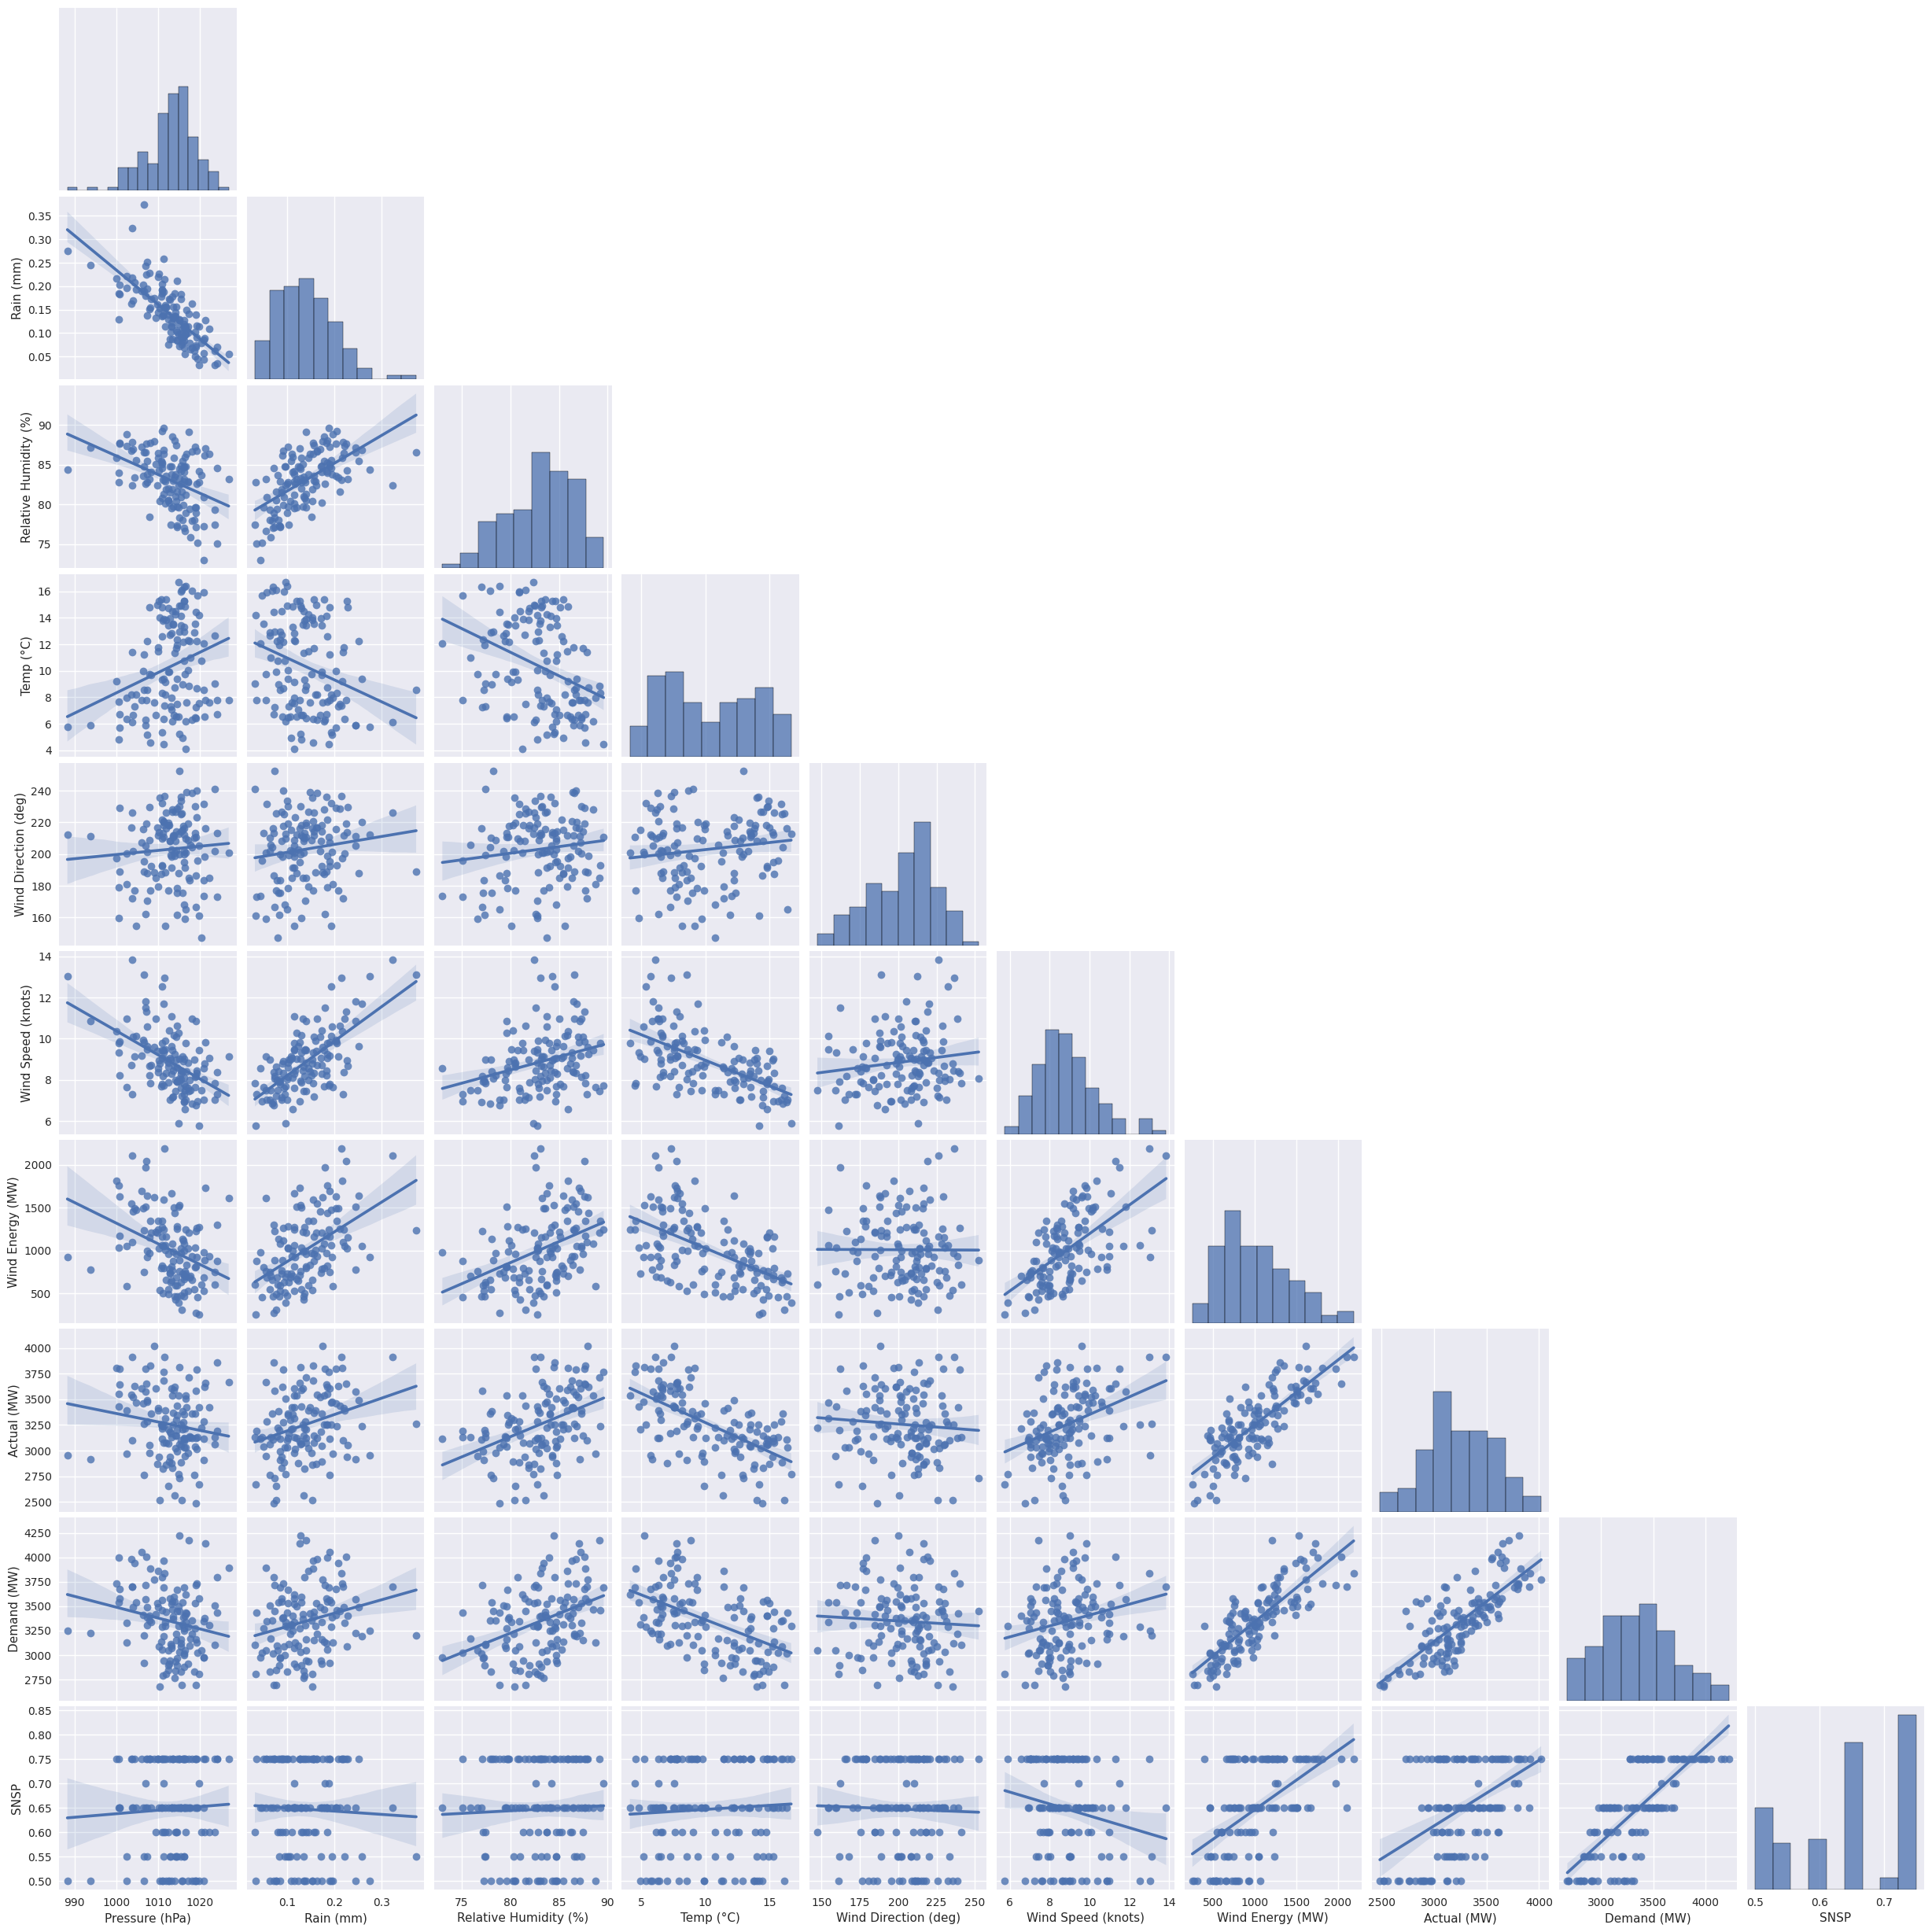

In [278]:
sns.pairplot(data= electricity_weather_monthly, kind= 'reg', corner = True)
plt.show()

In [279]:
electricity_weather.corr().round(3)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
Pressure (hPa),1.000,-0.397,-0.181,0.099,-0.026,-0.400,-0.353,-0.118,-0.059,0.022
Rain (mm),-0.397,1.000,0.270,0.001,-0.071,0.340,0.314,0.132,0.031,-0.010
Relative Humidity (%),-0.181,0.270,1.000,-0.289,-0.050,-0.186,0.016,-0.110,-0.230,0.015
Temp (°C),0.099,0.001,-0.289,1.000,-0.003,0.049,-0.090,-0.134,-0.052,0.049
Wind Direction (deg),-0.026,-0.071,-0.050,-0.003,1.000,0.157,0.064,-0.003,0.021,-0.011
Wind Speed (knots),-0.400,0.340,-0.186,0.049,0.157,1.000,0.797,0.365,0.175,-0.073
Wind Energy (MW),-0.353,0.314,0.016,-0.090,0.064,0.797,1.000,0.511,0.284,0.278
Actual (MW),-0.118,0.132,-0.110,-0.134,-0.003,0.365,0.511,1.000,0.777,0.269
Demand (MW),-0.059,0.031,-0.230,-0.052,0.021,0.175,0.284,0.777,1.000,0.411
SNSP,0.022,-0.010,0.015,0.049,-0.011,-0.073,0.278,0.269,0.411,1.000


Correlation between
* wind energy and wind speed 0.797
* no correlation between wind energy and wind direction. not a surprise as the turbines are turned to face the wind. 

* actual and demand. Not a surprise as demand increases the actual electricity production increases. 

* actual and wind energy 

## Seasonal Analysis

The pattern exhibited by a time series is determined by several components - the trend, the seasonality and residue. Trend, $T_t$ is the long-term increase or decrease in the data. Seasonality, $S_t$ is any periodic changes that occur at regular intervals. It has a fixed and known frequency. The residue, $R_t$ is anything that cannot be explained by the trend or seasonality.

Additive: $y_t = T_t + S_t + R_t$ 

Multiplicative: $y_t = T_t × S_t × R_t$

The time series can have [additive or multiplicative](https://online.stat.psu.edu/stat510/lesson/5/5.1#:~:text=The%20additive%20model%20is%20useful,seasonal%20variation%20increases%20over%20time.) decomposition. In the additive model, the seasonal variation stays relatively constant over time. For the multiplicative model, the seasonal variation increases over time.

The purpose of time series decomposition is to extract these three components from the data. Understanding the underlying patterns in time series is used improve machine learning models and forecast accuracy. 

[statsmodels.tsa](https://www.statsmodels.org/stable/tsa.html) has model classes and functions that are useful for time series analysis. Some of the functions associated with statsmodels.tsa are:

* [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). Plots the raw data, trend, seasonality and residue of the time series. Model parameter, which must either be additive or multiplicative. 

* [month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot). Seasonal plot of the monthly data.  

* [plot_acf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html). Plots the autocorrelation. 

* [plot_pacf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html). Plots the partial autocorrelation.


plot_acf and plot_pacf are autocorrelation plots. Autocorrelation is a plot between a variable and a lagged version of itself. Autocorrelation is used to determine if past data 
influences future data. Partial autocorrelation is similar but it ignores any data points between the data and the lagged data point. The lags are on the horizontal axis and the 
correlations on the vertical axis. The shaded blue area is the 95% confidence interval and any data points inside it are not statistically significant. 


https://otexts.com/fpp2/components.html

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://www.statsmodels.org/stable/examples/notebooks/generated/mstl_decomposition.html if time have a go at this. 

### Weather Trends

Weather trends are analysed but not discussed in the Jupyter notebook, [weather_trends.ipynb](weather_trends.ipynb). The CSV file, full_weather.csv was read into Pandas and transformed to create the full_weather dataframe. The weather trends since 1945 were examined. 

The main finding is that wind speeds are decreasing. In 1945, the mean wind speed was 10.70 knots. The mean wind speed almost 80 years later, in 2024, was 8.56 knots. This is a 20% decrease in wind speeds. 

![Wind speeds since 1944](plots/Wind_speed_rolling.png)

The seasonal decomposition shows the seasonality in the wind speeds. The wind speeds are lower in winter months 

![Seasonal Decomposition](plots/seasonal_windspeed.png)


month_plot is a seasonality curve. The black lines are the values for each month. The red line is the average wind speed for that month.

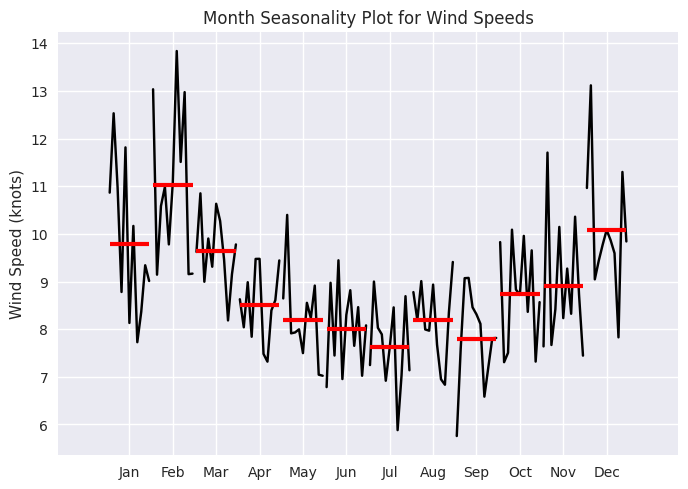

In [280]:
# Seasonality curve. Black is values for each month. Red is the average for that month.

month_plot(electricity_weather_monthly['Wind Speed (knots)'], ylabel= 'Wind Speed (knots)')
plt.title('Month Seasonality Plot for Wind Speeds')
plt.show()


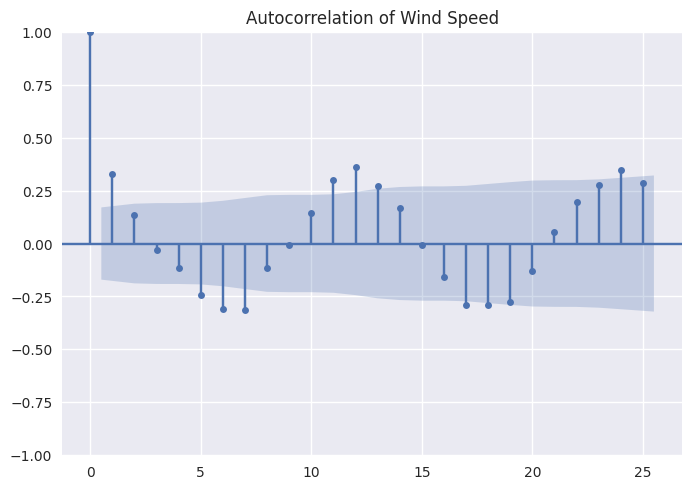

In [281]:
from statsmodels.graphics import tsaplots


tsaplots.plot_acf(electricity_weather_monthly['Wind Speed (knots)'], lags= 25)

plt.title('Autocorrelation of Wind Speed')
plt.savefig('plots/acf_windspeed.png')


### Wind Energy Trends

In [282]:
wind_energy_by_year = electricity_weather.groupby(electricity_weather.index.year)['Wind Energy (MW)'].agg(['max', 'mean'])
print(wind_energy_by_year)

          max         mean
date                      
2014  1818.75   577.399201
2015  2024.25   746.253796
2016  2186.25   690.754696
2017  2595.25   824.732820
2018  3019.50   991.110859
2019  3104.50  1083.981550
2020  3324.75  1260.130009
2021  3540.75  1085.230679
2022  3570.00  1241.567837
2023  3814.25  1300.778639
2024  3790.75  1266.635616


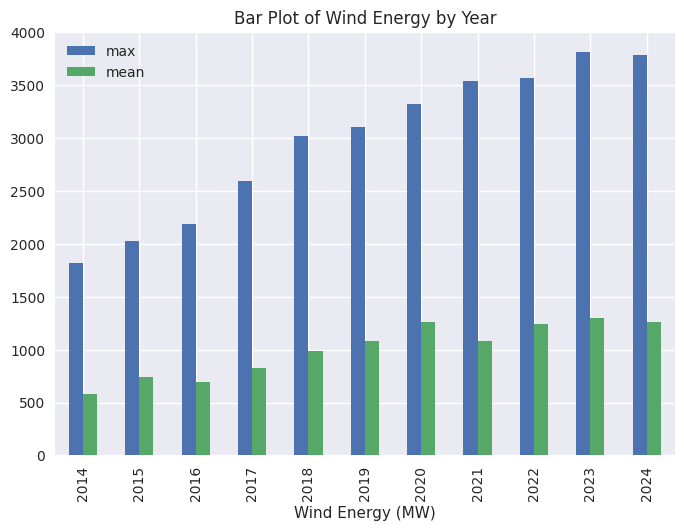

In [283]:
wind_energy_by_year.plot(kind = 'bar')
plt.title('Bar Plot of Wind Energy by Year')
plt.xlabel('Wind Energy (MW)')
plt.show()

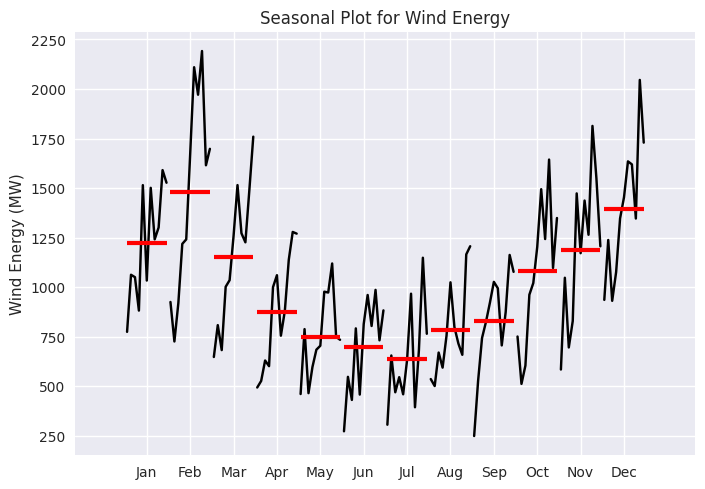

In [284]:
month_plot(electricity_weather_monthly['Wind Energy (MW)'], ylabel= 'Wind Energy (MW)')
plt.title('Seasonal Plot for Wind Energy')
plt.show()

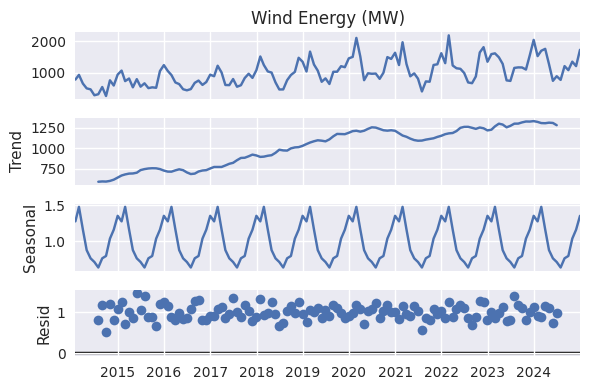

In [285]:
rcParams['figure.figsize'] = 6, 4

decomposition = sm.tsa.seasonal_decompose(electricity_weather_monthly['Wind Energy (MW)'], model= 'mul', period = 12)
fig = decomposition.plot()


The amount of wind energy has steadily increased since 2014. Factors = increasing number of wind farms, increase in SNSP limit. 

Clearly see the seasonal trend in wind energy. More produced in the winter months. Correlation with wind speed. 

## Machine Learning

Aim: Can the weather data be used to predict the wind energy?



In [286]:
# Drop columns
electricity_weather.drop(['Actual (MW)', 'Demand (MW)', 'SNSP'], axis= 1, inplace= True)

In [287]:
# Create features
X = electricity_weather.drop('Wind Energy (MW)', axis= 1)

In [288]:
# Create target
y = electricity_weather['Wind Energy (MW)']

In [289]:
print(X.shape, y.shape)

(96432, 6) (96432,)


For machine learning it is important to split the data into a training and test set. Usually the data is split into training and test sets using random sampling. The training set is used to fit a machine learning model and the test set is used to evaluate the model. Test set data should not be exposed to the model until testing time to prevent data leakage. However, for time series data it is important to keep the data in chronological order to prevent data leakage.

There are a number of ways to split the data for time series analysis:

* [train_test_split with shuffle = false](https://stackoverflow.com/questions/74025273/is-train-test-splitshuffle-false-appropriate-for-time-series). The parameter of shuffle = False is very important as otherwise that data will be shuffled. 

* [sklearn.model_selection.TimeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split). TimeSeriesSplit is a variation of k-fold cross-validation. It returns successive training sets that are supersets of those that come before them.

* [iloc or loc](https://pandas.pydata.org/docs/user_guide/indexing.html) to split the data into training and test set. 


https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

To start with I will create a linear regression model on the full data set and measure it's performance on the test data. R_squared 

### Linear Regression Model

In [290]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

reg = LinearRegression()

reg.fit(X_train, y_train)
y_predictions = reg.predict(X_test)

# Calculate R-squared, default metric for linear regression, value between 0 and 1
score = r2_score(y_test, y_predictions)

print(f'R squared: {score}')

# Root mean squared error, measured in units of target variable squared. 
rmse = root_mean_squared_error(y_test, y_predictions)

print(f'RMSE: {rmse}')


R squared: 0.5135062002223099
RMSE: 639.0468827143267


In the Udemy course, [Python for Time Series Analysis](https://www.udemy.com/course/python-for-time-series-data-analysis/) it stated that the size of the data set is important and to consider the effect that older data has on the model. As the SNSP limit has increased and with the increasing number of wind farms, the data set will excluded data prior to 2019. 

In [291]:
data_2019_onwards = electricity_weather.loc['2019' : ]
data_2019_onwards.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW)
date,,,,,,,
2019-01-01 00:00:00,1035.76,0.03,83.50,9.26,241.67,6.17,593.25
2019-01-01 01:00:00,1035.63,0.04,84.08,9.08,239.17,6.00,602.50
2019-01-01 02:00:00,1035.71,0.04,84.08,9.03,240.00,5.67,507.50
2019-01-01 03:00:00,1035.95,0.04,83.25,9.08,226.67,6.00,459.75
2019-01-01 04:00:00,1036.13,0.02,84.17,9.01,237.50,6.00,354.75


In [292]:
X = data_2019_onwards.drop('Wind Energy (MW)', axis= 1)
y = data_2019_onwards['Wind Energy (MW)']

In [293]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

reg = LinearRegression()

reg.fit(X_train, y_train)
y_predictions = reg.predict(X_test)

# Calculate R-squared, default metric for linear regression, value between 0 and 1
score = r2_score(y_test, y_predictions)

print(f'R squared: {score}')

# Root mean squared error, measured in units of target variable squared. 
rmse = root_mean_squared_error(y_test, y_predictions)

print(f'RMSE: {rmse}')

R squared: 0.7649957964688938
RMSE: 447.87900573384445


In [294]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
y_predictions_scaled = reg.predict(X_test_scaled)

# Calculate R-squared, default metric for linear regression, value between 0 and 1
score = r2_score(y_test, y_predictions_scaled)
print(f'R squared: {score}')

# Root mean squared error, measured in units of target variable squared. 
rmse = root_mean_squared_error(y_test, y_predictions_scaled)
print(f'RMSE: {rmse}')

R squared: 0.7649957964688938
RMSE: 447.87900573384445


IF TIME STANDARD SCaLAR AND TRANSFORM. 

In [295]:
#from sklearn.pipeline import Pipeline
#
#steps = [("scaler", StandardScaler()),
#         ("lasso", Lasso(alpha=0.001))]
#
#pipeline = Pipeline(steps)
#pipeline.fit(X_train, y_train)
#
## Calculate and print R-squared
#print(pipeline.score(X_test, y_test))

Excluding data prior to 2019 improved the model performance from 0.51 to 0.76, with RMSE error reducing from 639 MW to 447 MW. 

### Decision Tree Model

For tree base models transformation and scaling are not typically required. EXPAND

This YouTube video, [Time Series Forecasting with XGBoost](https://www.youtube.com/watch?v=vV12dGe_Fho&feature=youtu.be) and it's accompanying [kaggle notebook](https://www.kaggle.com/code/robikscube/pt2-time-series-forecasting-with-xgboost/notebook), were used as references in the use of TimeSeriesSplit. 


In [296]:
tss = TimeSeriesSplit(n_splits = 5)

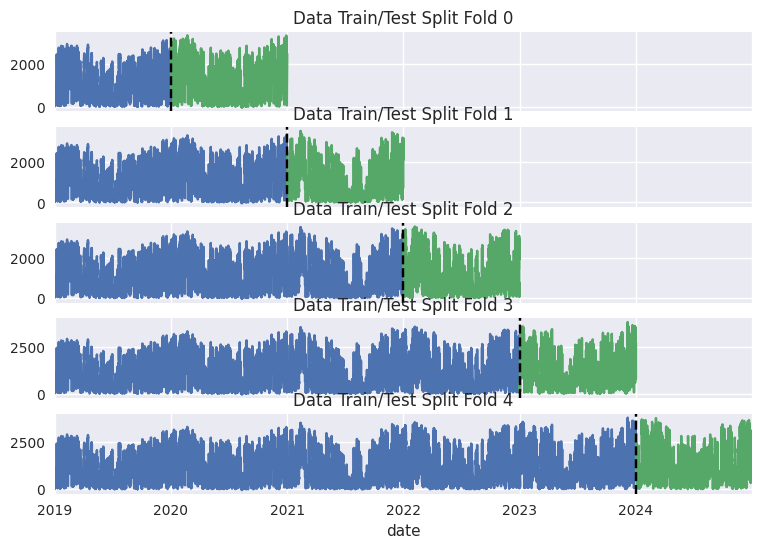

In [297]:
# Plot the train and test folds
fig, axs = plt.subplots(5, 1, figsize=(9, 6), sharex=True)

fold = 0

for train_idx, val_idx in tss.split(X):
    train = data_2019_onwards.iloc[train_idx]
    test = data_2019_onwards.iloc[val_idx]
    train['Wind Energy (MW)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Wind Energy (MW)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [298]:
from sklearn.tree import DecisionTreeRegressor

predictions = []
scores = []
r_squares = []

for train_idx, val_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx, :], X.iloc[val_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

    dtr = DecisionTreeRegressor(max_depth = 3)

    dtr.fit(X_train, y_train)

    y_prediction = dtr.predict(X_test)
    predictions.append(y_prediction)


    rmse = root_mean_squared_error(y_test, y_prediction)
    scores.append(rmse)

    r_squared = dtr.score(X_test, y_test)
    r_squares.append(r_squared)

In [299]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 407.2760
Fold scores:[380.93594624913135, 383.30546746673434, 404.9007726654956, 421.8206639164017, 445.41713237771364]


In [300]:
print(f'R_squared across folds {np.mean(r_squares):0.4f}')
print(f'R_squared scores:{r_squares}')

R_squared across folds 0.7910
R_squared scores:[0.8012047620514513, 0.8005857938390448, 0.8083374711569741, 0.7888940237295403, 0.7559058486988789]


In [301]:
print("Predictions: {},\nActual Values: {}".format(y_prediction[:5].round(2), y_test[:5].values))

Predictions: [2202.11 2202.11 1800.24 2202.11 1800.24],
Actual Values: [2772.5  2883.   2954.25 2857.75 2756.  ]


With decision trees it is possible to view how the [features influenced the model](https://www.geeksforgeeks.org/understanding-feature-importance-and-visualization-of-tree-models/) and to view the decision tree.  

In [302]:
importances = dtr.feature_importances_
importances


array([0.        , 0.        , 0.03910488, 0.        , 0.        ,
       0.96089512])

In [303]:
feature_names = X.columns
feature_names

Index(['Pressure (hPa)', 'Rain (mm)', 'Relative Humidity (%)', 'Temp (°C)',
       'Wind Direction (deg)', 'Wind Speed (knots)'],
      dtype='object')

In [304]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head()



,Feature,Importance
5,Wind Speed (knots),0.960895
2,Relative Humidity (%),0.039105
1,Rain (mm),0.000000
0,Pressure (hPa),0.000000
3,Temp (°C),0.000000


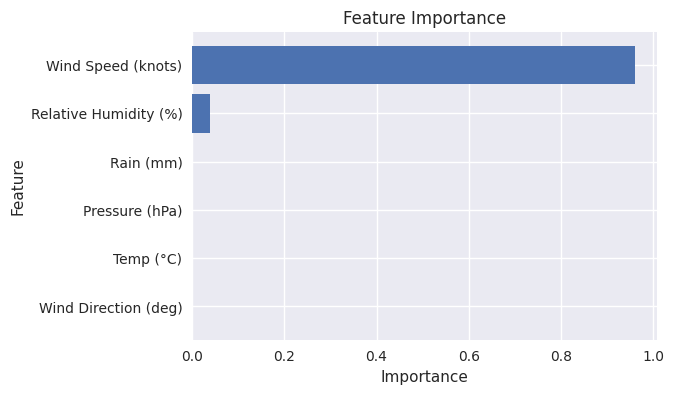

In [305]:
# Plot the feature importances
plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

To predict the wind energy output, only two features, the wind speed and the relative humidity are considered important. 

Decision tree is visualized using the [plot_tree function](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.plot_tree.html). 


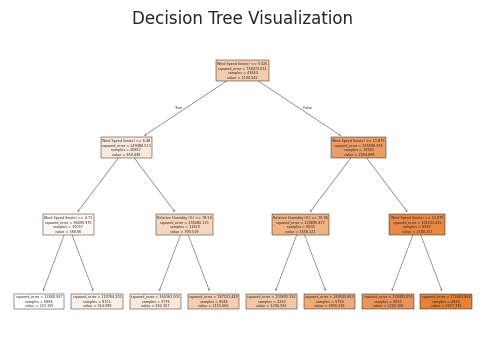

In [306]:

plt.figure()
plot_tree(dtr, filled=True, feature_names= X_train.columns, class_names= y_train)
plt.title('Decision Tree Visualization')
plt.show()

Decision tree regression

https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet

When should you not normalise in machine learning https://stackoverflow.com/questions/49543049/scaling-features-for-prediction-in-scikit-learn?rq=3

https://stackoverflow.com/questions/49543049/scaling-features-for-prediction-in-scikit-learn?rq=3

Elastic Net regression https://www.youtube.com/watch?v=1dKRdX9bfIo

## Forecasting

Aim: Predict wind energy output for the 24 months.

[Exponential smoothing](https://otexts.com/fpp2/expsmooth.html) is used for forecasting data. Forecasts produced with exponential smoothing assign more weight to recent observations and less weight to older ones. It is useful for data with trends or patterns that change over time. There are three types of exponential smoothing: 
* simple exponential smoothing (SES). Suitable for data with no clear trend or seasonal behaviour. 
* double exponential smoothing (DES). Takes trends in the data into account. DES is also known as Holt's trend method.
* triple exponential smoothing (TES). Takes trends and seasonality in the data into account. TES is also known as Holt-Winters' seasonal method. 


udemy.com

https://www.youtube.com/watch?v=9QtL7m3YS9I Kishan Manani - Feature Engineering for Time Series Forecasting | PyData London 2022

### Building a Model on Weekly Data

In [307]:
electricity_weather_weekly = electricity_weather.resample('W').mean()
electricity_weather_weekly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW)
date,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,948.806250
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,770.965774
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,424.248512
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,941.940476
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,994.949405


Text(0.5, 1.0, 'Autocorrelation of Wind Speed')

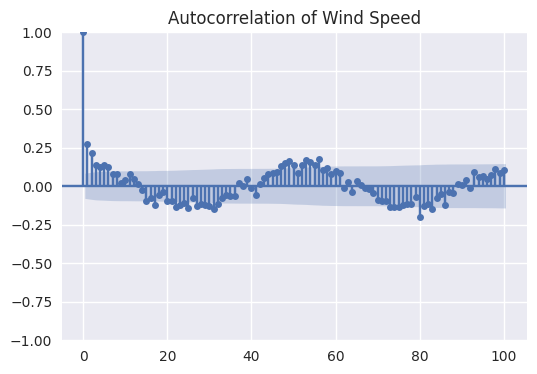

In [308]:



tsaplots.plot_acf(electricity_weather_weekly['Wind Speed (knots)'], lags= 100)

plt.title('Autocorrelation of Wind Speed')
#plt.savefig('plots/acf_windspeed.png')

In [309]:
electricity_weather_weekly['TESmul52'] = ExponentialSmoothing(electricity_weather_weekly['Wind Energy (MW)'], trend= 'mul', seasonal= 'mul', seasonal_periods= 52).fit().fittedvalues
electricity_weather_weekly.head()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),TESmul52
date,,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,948.806250,826.219412
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,770.965774,753.529644
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,424.248512,888.530948
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,941.940476,722.369281
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,994.949405,1095.005546


In [310]:
electricity_weather_weekly['TESadd52'] = ExponentialSmoothing(electricity_weather_weekly['Wind Energy (MW)'], trend= 'add', seasonal= 'add', seasonal_periods= 52).fit().fittedvalues
electricity_weather_weekly.head()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),TESmul52,TESadd52
date,,,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,948.806250,826.219412,893.908291
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,770.965774,753.529644,793.358908
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,424.248512,888.530948,976.700286
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,941.940476,722.369281,781.365848
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,994.949405,1095.005546,1243.268372


<Axes: xlabel='date'>

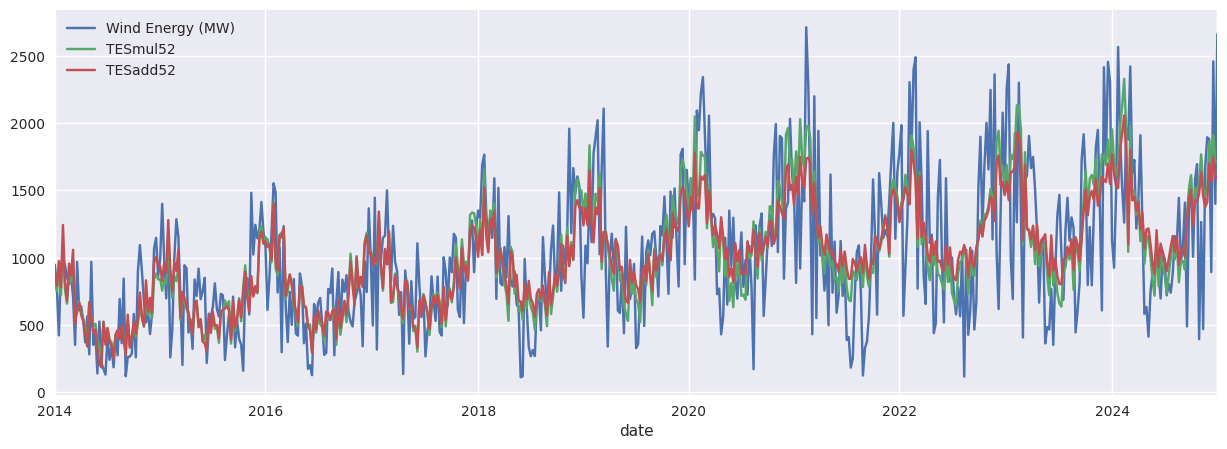

In [311]:
electricity_weather_weekly[['Wind Energy (MW)', 'TESmul52', 'TESadd52']].plot(figsize = (15,5))

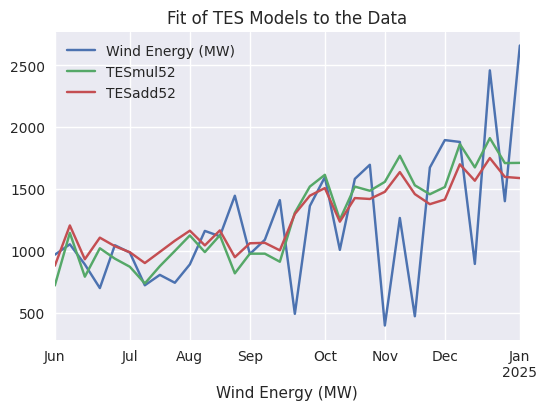

In [312]:
electricity_weather_weekly.loc['2024-06' :][['Wind Energy (MW)', 'TESmul52', 'TESadd52']].plot()

plt.title('Fit of TES Models to the Data')
plt.xlabel('Wind Energy (MW)')
plt.show()

The Holts-Winters model is not a good fit for the weekly data. 

Attempt now on the monthly data. 

### Building a Model on Monthly Data

In [313]:
# Multiplicative Model
electricity_weather_monthly['TESmul12'] = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend= 'mul', seasonal= 'mul', seasonal_periods= 12).fit().fittedvalues
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12
date,,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,774.699933,2918.037970,3226.143481,0.5,850.384912
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,925.433780,2957.232143,3247.277902,0.5,779.327651
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,647.850806,2879.901210,3093.364583,0.5,692.240863
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,493.911111,2653.940625,2844.000347,0.5,537.923361
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,461.017809,2560.199933,2766.980847,0.5,509.041373


In [314]:
# Additive Model
electricity_weather_monthly['TESadd12'] = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend= 'add', seasonal= 'add', seasonal_periods= 12).fit().fittedvalues
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,774.699933,2918.037970,3226.143481,0.5,850.384912,936.714624
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,925.433780,2957.232143,3247.277902,0.5,779.327651,827.035508
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,647.850806,2879.901210,3093.364583,0.5,692.240863,688.492089
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,493.911111,2653.940625,2844.000347,0.5,537.923361,490.527706
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,461.017809,2560.199933,2766.980847,0.5,509.041373,430.442337


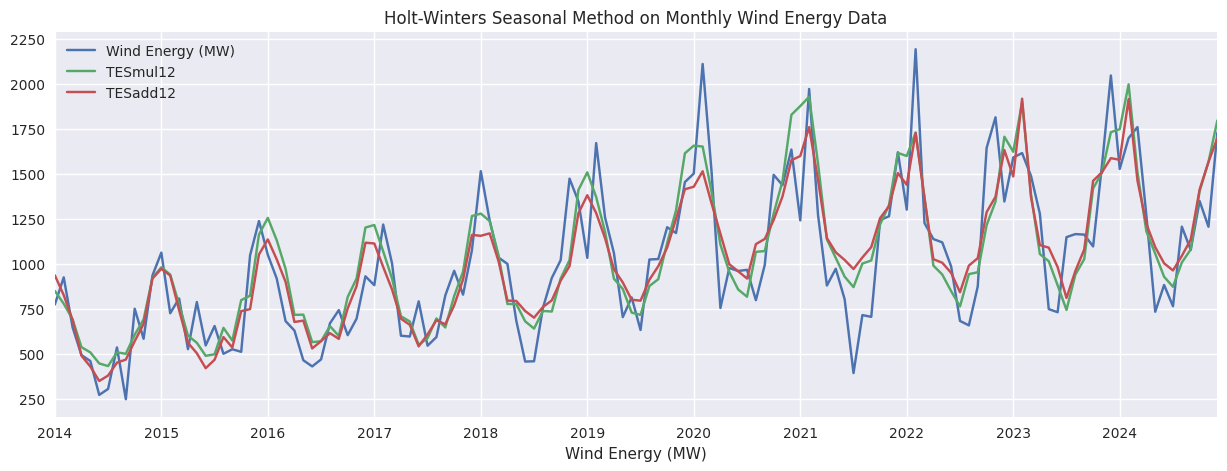

In [315]:
electricity_weather_monthly[['Wind Energy (MW)', 'TESmul12', 'TESadd12']].plot(figsize = (15,5))

plt.title('Holt-Winters Seasonal Method on Monthly Wind Energy Data')
plt.xlabel('Wind Energy (MW)')
plt.show()


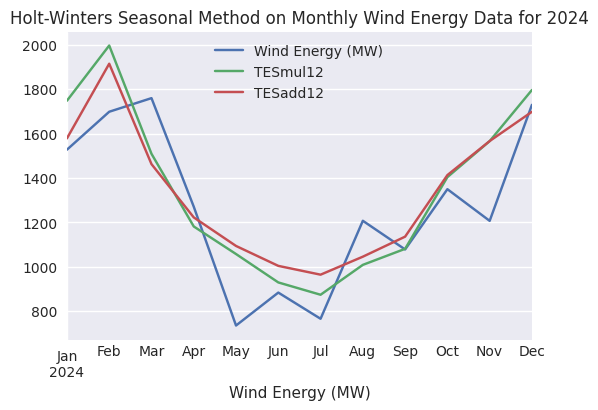

In [316]:
electricity_weather_monthly.loc['2024'][['Wind Energy (MW)', 'TESmul12', 'TESadd12']].plot()

plt.title('Holt-Winters Seasonal Method on Monthly Wind Energy Data for 2024')
plt.xlabel('Wind Energy (MW)')
plt.show()

### Building WInd Energy Forecasting Model

In [317]:
train_data = electricity_weather_monthly.iloc[:105]
train_data.tail()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2022-05-31,1016.039449,0.090255,79.889718,12.200094,217.908831,8.915941,1119.702621,3276.023438,3389.601402,0.75,941.253235,1006.665697
2022-06-30,1013.658000,0.132264,79.760944,13.508181,210.671319,8.463111,986.389583,3252.662261,3367.269928,0.75,849.084202,950.466927
2022-07-31,1020.932540,0.056183,80.869637,15.922742,231.394153,7.034059,683.578965,3280.227785,3342.751438,0.75,764.002040,842.891005
2022-08-31,1018.164234,0.067984,77.941720,16.012083,204.429906,6.833858,659.016129,3357.672721,3351.274924,0.75,943.398460,990.700834
2022-09-30,1013.521264,0.156681,82.980403,13.552903,211.871472,7.199708,875.273958,3370.049784,3396.116826,0.75,953.809262,1032.115843


In [318]:
test_data = electricity_weather_monthly.iloc[105:]
test_data.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2022-10-31,1007.342581,0.251989,85.435645,12.211022,187.829247,9.655121,1643.985551,3489.083823,3493.416289,0.75,1215.403486,1287.426612
2022-11-30,1000.081611,0.216708,85.898792,9.182306,197.166569,10.362319,1813.817361,3805.808677,3731.265601,0.75,1345.728745,1372.783662
2022-12-31,1008.167715,0.154798,87.706196,4.587298,177.023898,7.829032,1346.522849,3827.614596,3880.938397,0.75,1706.012048,1631.934487
2023-01-31,1011.372124,0.154382,86.325524,6.333038,220.655430,9.342446,1590.782594,3681.369739,3962.977235,0.75,1622.510466,1485.456649
2023-02-28,1026.851920,0.054911,83.222113,7.796845,201.020685,9.156071,1615.236421,3670.359929,3893.224330,0.75,1897.207349,1917.145193


In [319]:
# Fit the model
fitted_model = ExponentialSmoothing(train_data['Wind Energy (MW)'], trend = 'mul',seasonal= 'mul', seasonal_periods=12).fit()

In [320]:
# Generate predictions
test_predictions = fitted_model.forecast(27).rename('Wind Energy Forecast')

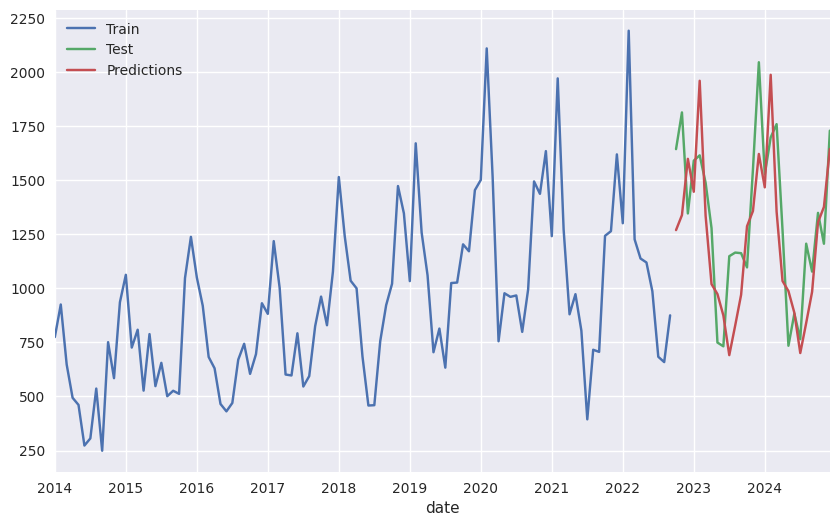

In [321]:
train_data['Wind Energy (MW)'].plot(legend = True, label = 'Train', figsize= (10, 6))
test_data['Wind Energy (MW)'].plot(legend= True, label = 'Test')
test_predictions.plot(legend= True, label = 'Predictions')
plt.show()

Evaluation Metrics

In [322]:
r2_score(test_data['Wind Energy (MW)'], test_predictions)

0.4401961613873199

In [323]:
MAE = mean_absolute_error(test_data['Wind Energy (MW)'], test_predictions)
MAE

230.90554733501827

In [324]:
RMSE = root_mean_squared_error(test_data['Wind Energy (MW)'],test_predictions)
RMSE

265.306914318328

Forecasting data is done on the full data set. 

In [325]:
final_model = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend = 'add', seasonal= 'add', seasonal_periods= 12).fit()

In [326]:
# 24 month forecast
forecast_predictions = final_model.forecast(24)

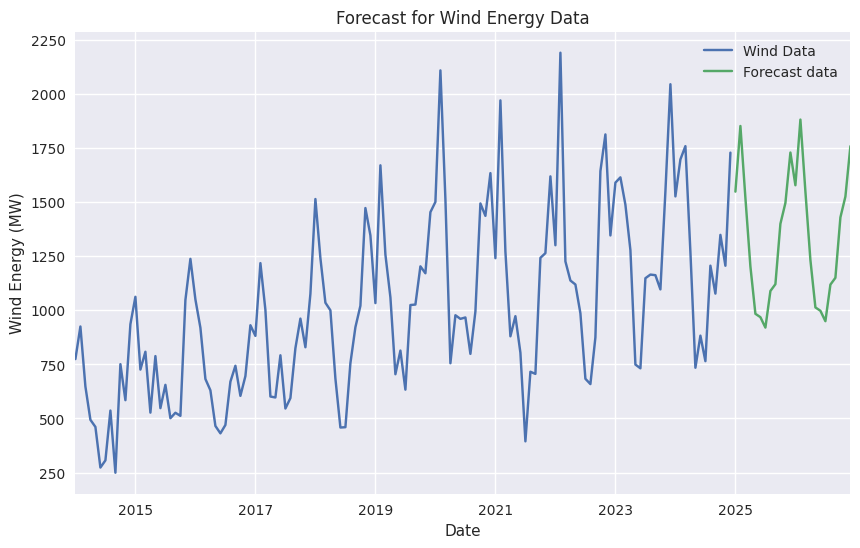

In [327]:
# Plot of 
electricity_weather_monthly['Wind Energy (MW)'].plot(figsize=(10, 6), label = 'Wind Data')
forecast_predictions.plot(label = 'Forecast data')

plt.legend()
plt.title('Forecast for Wind Energy Data')
plt.xlabel('Date')
plt.ylabel('Wind Energy (MW)')
plt.show()

## Conclusion



## References

https://www.seai.ie/sites/default/files/data-and-insights/seai-statistics/key-publications/renewable-energy-in-ireland/First-Look-Renewable-Energy-in-Ireland-Report.pdf

https://www.greencollective.io/

https://www.greencollective.io/post/annual-recap-2023

https://www.seai.ie/data-and-insights/seai-statistics/renewables

https://windenergyireland.com/latest-news/2526-dispatch-down-and-the-fight-against-climate-change

https://windenergyireland.com/about-wind/the-basics/facts-stats

http://www.iwea.ie/technicalfaqs


### Data Sets

[GitHub Daniel Parke]https://github.com/Daniel-Parke/EirGrid_Data_Download/tree/main

https://realpython.com/linear-regression-in-python/


__Problems that arose__

[Git LFS (large file storage)](https://git-lfs.com/). Some of the weather data files were larger than GitHub's recommended maximum file size of 50.00 MB. Installed and used Git lfs


https://mljar.com/blog/matplotlib-colors/
